In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

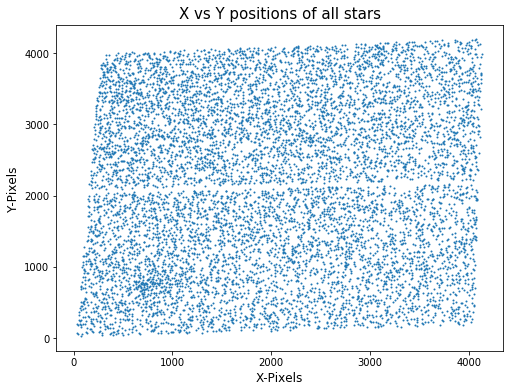

In [2]:
data = np.loadtxt("ngc6397.dat",skiprows=1)
X, Y = data[:,0], data[:,1]

plt.figure(figsize=(8,6))
plt.plot(X, Y, 'o', markersize = 1)
plt.xlabel("X-Pixels",fontsize=12)
plt.ylabel("Y-Pixels",fontsize=12)
plt.title("X vs Y positions of all stars",fontsize=15)
plt.savefig("plot1.png")

1. Yes

2. Not exactly orthogonal. Blooming/bleeding effect leading to saturation? 

On sky, the WFC aperture is roughly square, and it is natural to design observations in steps of 90° to consistently cover the same area. There will be some region at the edges not covered at all four orientations. However, a square area of side 194.8 arcseconds centered on WFCENTER, and with edges parallel to the V2 and V3 axes, is overlapped at all four positions. In designing a mosaic that combines observations at 90°  steps, a translation of about 190 arcseconds between pointings would provide continuous coverage.

3. Yes, there's a gap through the middle of the y-axis.The WFC detector consists of two 4096 × 2048 charge-coupled devices that are sensitive from the blue edge of the visual spectrum to the near-IR, called WFC1 and WFC2. These CCDs are thinned, backside-illuminated devices manufactured by Scientific Imaging Technologies (SITe), and are butted together to create an effective 4096 × 4096 pixel (202 × 202 arcsec^2) array with a gap corresponding to approximately 50 pixels (2.5 arcsec) between the chips. The CCD camera design incorporates a warm dewar window, designed to prevent buildup of contaminants on the window that cause a loss of UV throughput.


4. There seems to be an over-abundance of stars at about (900,900). 
    
5. Any peculiarities? 

In [3]:
dX, dY = data[:,4], data[:,5]

rep_dX = np.count_nonzero(dX == 999.999)  # number of repeated dX values of 999.999, also use len(dX[dX==999.999])
rep_dY = np.count_nonzero(dY == 999.999)  # number of repeated dY values of 999.999

# rep_dX == rep_dY

print("Number of stars with valid Proper Motions: ", len(dX) - rep_dX)
print("Number of stars with invalid Proper Motions: ", rep_dX)

Number of stars with valid Proper Motions:  5162
Number of stars with invalid Proper Motions:  3412


3412

# Data Cleaning

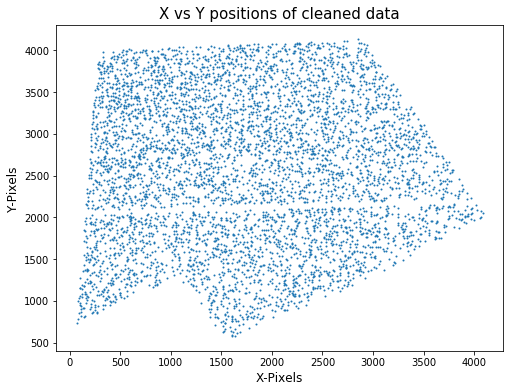

In [4]:
cleanData = data[np.logical_or(dX != 999.999, dY != 999.999)]  # Can also be achieved by the folllowing:

# cleanData = []

# for i in range(len(dX)):
#     if dX[i] != 999.999:
#         cleanData.append(data[i,:])

#cleanData = np.array(cleanData)

cleanX, cleanY = cleanData[:,0], cleanData[:,1]
clean_dX, clean_dY = cleanData[:,4], cleanData[:,5]

plt.figure(figsize=(8,6))
plt.plot(cleanX, cleanY, 'o', markersize = 1)
plt.xlabel("X-Pixels",fontsize=12)
plt.ylabel("Y-Pixels",fontsize=12)
plt.title("X vs Y positions of cleaned data",fontsize=15)  
plt.savefig("plot2.png")

In [5]:
priX = np.count_nonzero(cleanX == 999.999)  # number of repeated clean X values of 999.999
priY = np.count_nonzero(cleanY == 999.999)  # number of repeated clean Y values of 999.999

print("Number of stars with invalid X position: ", priX, "and invalid Y position: ", priY)

# np.where(cleanX == 999.999) gives none. np.where(cleanY == 999.999) gives 1; index is 144. 

Number of stars with invalid X position:  0 and invalid Y position:  1


1. Footprints of the cleaned data is not exactly what I expected. I expected missing patches since we are indeed cleaning the data, but the clean 'cuts' was unexpected. Due to filters?

2. Since the cleaning was not really random/isotropically distributed (we see those clean cuts above), a possibility could be that these are due to dead pixels in the instrument. 

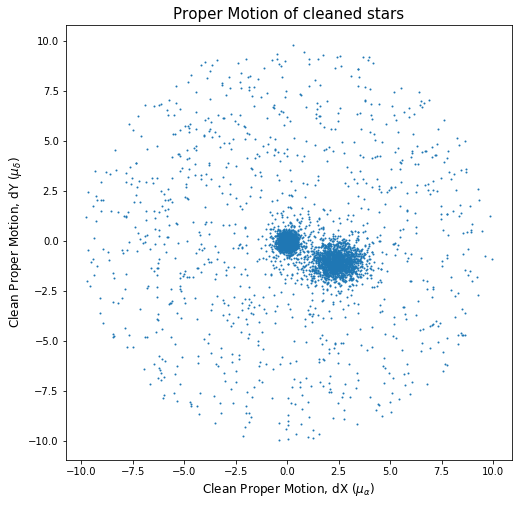

In [6]:
plt.figure(figsize=(8,8))
plt.plot(clean_dX, clean_dY, 'o', markersize = 1)
plt.title("Proper Motion of cleaned stars",fontsize=15)
plt.xlabel(r"Clean Proper Motion, dX ($\mu_{\alpha}$)", fontsize=12)
plt.ylabel(r"Clean Proper Motion, dY ($\mu_{\delta}$)", fontsize=12)
plt.savefig("plot3.png")

1. Clustering could be due to the fact that in NGC 6397, most of the stars have similar proper motions. Hence the 'cluster'. 

2. As mentioned, cluster stars should have similar proper motions since they are bound by the same gravitational effects, whereas field stars are not required to have similar proper motions as the cluster stars. Furthermore, 

3. I think the above because rogue/isolated stars could have a range of proper motions (due to being ejected from their system etc) and they aren't subject to the same gravitational force as cluster stars are. 

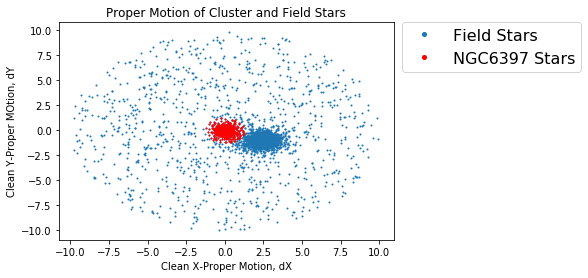

In [7]:
#plt.figure(figsize=(12,8))
clustars = np.where((clean_dX**2+clean_dY**2)<1.3**2)
fieldStars = np.where(((clean_dX-2.5)**2+(clean_dY+1)**2)<1.3**2)

NGC_dX, NGC_dY = clean_dX[clustars], clean_dY[clustars]
field_dX, field_dY = clean_dX[fieldStars], clean_dY[fieldStars]

plt.plot(clean_dX, clean_dY, 'o', markersize = 1, label="Field Stars")
plt.plot(NGC_dX, NGC_dY,'ro', markersize=1, label="NGC6397 Stars")
#plt.plot(field_dX, field_dY, 'go', markersize=1, label="Field Stars")
plt.xlabel("Clean X-Proper Motion, dX")
plt.ylabel("Clean Y-Proper MOtion, dY")
plt.title("Proper Motion of Cluster and Field Stars")
plt.legend(bbox_to_anchor=(1, 1.04), loc='upper left', prop={'size': 16},markerscale = 4)

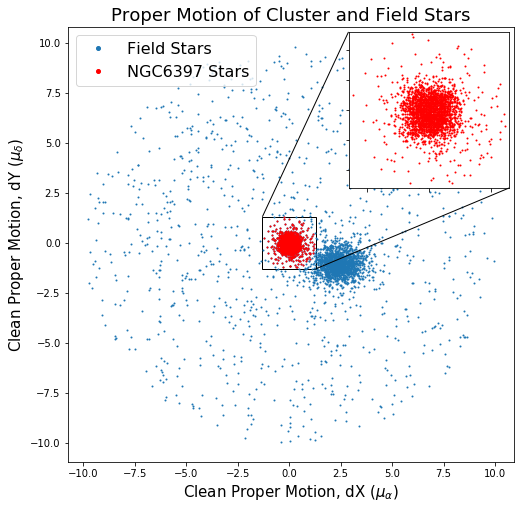

In [8]:
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(clean_dX, clean_dY, 'o', markersize = 1, label="Field Stars")
ax.plot(NGC_dX, NGC_dY,'ro', markersize=1, label="NGC6397 Stars")
plt.xlabel(r"Clean Proper Motion, dX ($\mu_{\alpha}$)", fontsize=15)
plt.ylabel(r"Clean Proper Motion, dY ($\mu_{\delta}$)", fontsize=15)
plt.title("Proper Motion of Cluster and Field Stars", fontsize=18)
#plt.legend(bbox_to_anchor=(1, 1.02), loc='upper left', prop={'size': 16},markerscale = 4)
plt.legend(loc='upper left', prop={'size': 16},markerscale = 4)
axins = zoomed_inset_axes(ax, 3, loc=1)
axins.plot(NGC_dX, NGC_dY, 'ro', markersize=1)
axins.set_xlim(-1.3, 1.3)
axins.set_ylim(-1.3, 1.3)
plt.xticks(visible=False)
plt.yticks(visible=False)
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="k")
plt.savefig("plot4.5.png")

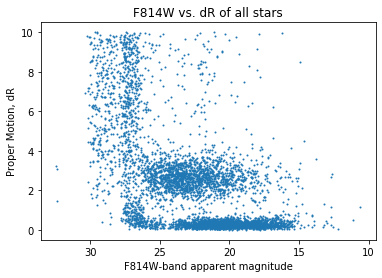

In [9]:
clean_dR = np.sqrt(clean_dX**2+clean_dY**2)
clean_F814W = cleanData[:,3]
clean_F606W = cleanData[:,2]

plt.plot(clean_F814W, clean_dR, 'o', markersize = 1)
plt.ylabel("Proper Motion, dR")
plt.xlabel("F814W-band apparent magnitude")
plt.title("F814W vs. dR of all stars")
plt.gca().invert_xaxis()

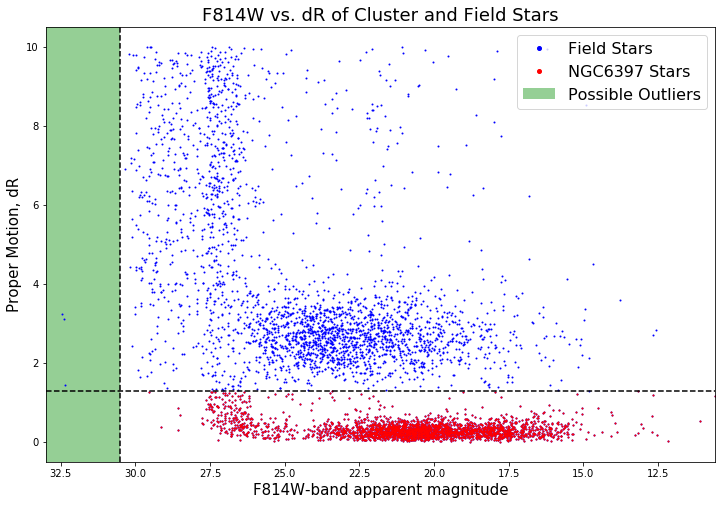

In [23]:
NGC_dR = np.sqrt(NGC_dX**2+NGC_dY**2)
field_dR = np.sqrt(field_dX**2+field_dY**2)
clean_F814W = cleanData[:,3]
clean_F606W = cleanData[:,2]

NGC_F814 = clean_F814W[clustars]
field_F814 = clean_F814W[fieldStars]

plt.figure(figsize=(12,8))
plt.plot(clean_F814W, clean_dR, 'bo', markersize = 1, label="Field Stars")
plt.plot(NGC_F814, NGC_dR, 'ro', markersize = 1, label="NGC6397 Stars")
plt.axhline(y=1.3, color='k', linestyle='--',)
plt.axvline(x=30.5, color='k', linestyle='--')
plt.ylabel("Proper Motion, dR", fontsize=15)
plt.xlabel("F814W-band apparent magnitude", fontsize=15)
plt.xticks(visible=True)
plt.yticks(visible=True)
plt.title("F814W vs. dR of Cluster and Field Stars",fontsize=18)
plt.gca().invert_xaxis()
plt.axvspan(33,30.5, facecolor='#2ca02c', alpha=0.5,label="Possible Outliers")
plt.xlim(33,min(clean_F814W))
plt.legend(loc='upper right', prop={'size': 16},markerscale = 4)
plt.savefig("plot4.png")

In [11]:
test_dR = clean_dR[clean_dR <= 1.3]
test_dR == NGC_dR

array([ True,  True,  True, ...,  True,  True,  True])

In [12]:
# NGC_dR = np.sqrt(NGC_dX**2+NGC_dY**2)
# field_dR = np.sqrt(field_dX**2+field_dY**2)
# clean_F814W = cleanData[:,3]
# clean_F606W = cleanData[:,2]

# NGC_F814 = clean_F814W[clustars]
# NGC_dR = NGC_dR[NGC_F814<=25]
# NGC_F814 = NGC_F814[NGC_F814<=25]

# field_F814 = clean_F814W[fieldStars]

# plt.plot(NGC_F814, NGC_dR, 'ro', markersize = 1, label="NGC6397 Stars")
# plt.plot(field_F814, field_dR, 'go', markersize = 1, label="Field Stars")
# plt.ylabel("Clean Proper Motion, dR")
# plt.xlabel("Clean F814W-band magnitude")
# plt.title("Star Proper Motion as a function of magnitude")
# plt.legend(bbox_to_anchor=(1, 1.045), loc='upper left', prop={'size': 16},markerscale = 4)
# plt.gca().invert_xaxis()

1. This further supports my criterion: the field stars could have a range of proper motions as we can see in the vertical bar of the plotted stars. They range from 0 to 10 for dR. Whereas for the cluster stars, they are mainly secluded in the two blobs: the bottom blob with a dR of roughly 0.5 and the upper blob with dR of about 3. These cluster stars have roughly these proper motions and not very high ones such as the field stars. 

2. If we just want the cluster stars, we can constrain the dR values from 0 to 4. This would still give us some field stars that have proper motion in this range, but doing this will better our analysis. The field stars with dR > 4 can be removed as in the cleaning process before.

# Using the cleaned data to create a CMD

Text(0.5, 1.0, 'CMD of field stars')

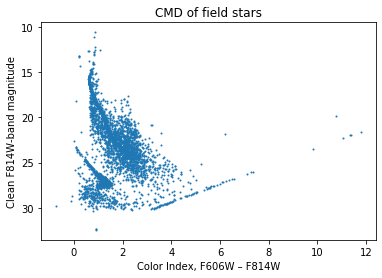

In [13]:
colIndex = clean_F606W - clean_F814W

plt.plot(colIndex, clean_F814W, 'o', markersize=1)
plt.xlabel("Color Index, F606W – F814W")
plt.ylabel("Clean F814W-band magnitude")
plt.gca().invert_yaxis()
plt.title("CMD of field stars")

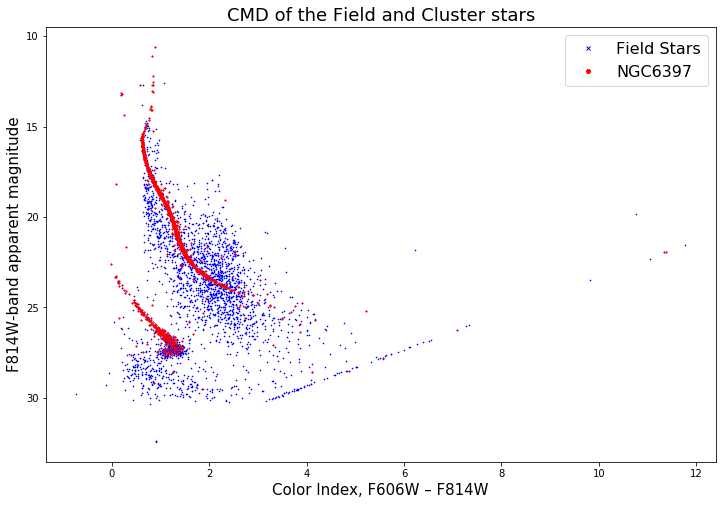

In [14]:
NGC_F606 = clean_F606W[clustars]
#field_F606 = clean_F606W[fieldStars]

NGC_colIndex = NGC_F606 - NGC_F814
#field_colIndex = field_F606 - field_F814

plt.figure(figsize=(12,8))
plt.plot(colIndex, clean_F814W, 'bx', markersize=1,label="Field Stars")
plt.plot(NGC_colIndex, NGC_F814, 'ro', markersize = 1, label="NGC6397")
#plt.plot(field_colIndex, field_F814, 'bo', markersize = 1, label="Field Stars")
plt.xlabel("Color Index, F606W – F814W",fontsize=15)
plt.ylabel("F814W-band apparent magnitude",fontsize=15)
plt.gca().invert_yaxis()
plt.title("CMD of the Field and Cluster stars",fontsize=18)
#plt.legend(bbox_to_anchor=(1, 1.045), loc='upper left', prop={'size': 16},markerscale = 4)
plt.legend(loc='upper right', prop={'size': 16},markerscale = 4)

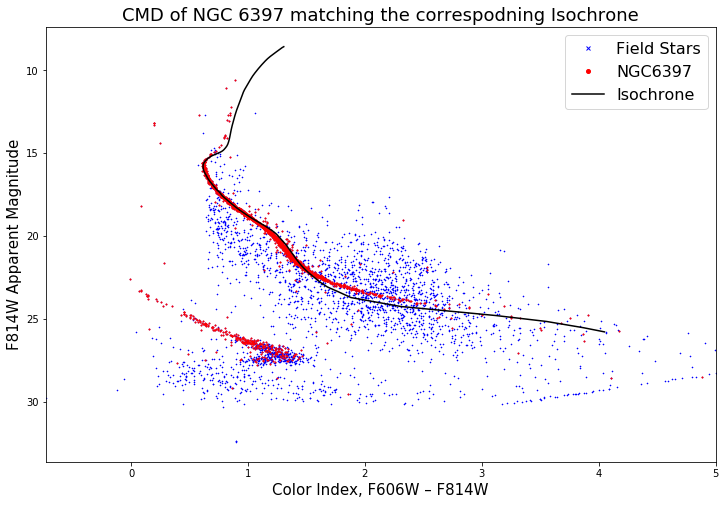

In [28]:
isoData = np.loadtxt("iso.dat")
mass = isoData[:,0]
colour = isoData[:,1]
absMag = isoData[:,2]

# To plot in new window to check points. 
# %matplotlib qt  

# To plot in same windows, under cell. 
#%matplotlib inline  

plt.figure(figsize=(12,8))
plt.plot(colIndex, clean_F814W, 'bx', markersize=1,label="Field Stars")
plt.plot(NGC_colIndex, NGC_F814, 'ro', markersize = 1, label="NGC6397")
plt.plot(colour+0.19, absMag+12.45, 'k-', markersize = 1, label="Isochrone")
plt.xlabel("Color Index, F606W – F814W",fontsize=15)
plt.ylabel("F814W Apparent Magnitude",fontsize=15)
plt.gca().invert_yaxis()
plt.title("CMD of NGC 6397 matching the correspodning Isochrone", fontsize=18)
plt.legend(loc='upper right', prop={'size': 16},markerscale = 4)
plt.xlim(min(colIndex),5)
plt.savefig("plot5.png")

Distance modulus: $$ m - M = 5log \left(\frac{d}{10pc}\right) + A $$ where $$A = 3.1E(F606W - F814W) $$

In [29]:
#Taking mean between E = [1, 1.1]

#m = np.mean(NGC_F814[np.where(np.logical_and(NGC_colIndex >= 1, NGC_colIndex <= 1.1))])  #NGC appMag
#M = np.mean(absMag[np.where(np.logical_and(colour >= 1, colour <= 1.1))][-3:-1])  # isoAbsMag

E = 0.19
A = 1.751*E
d = 10*(10**(((12.45)-A)/5))
print("Distance to NGC 6397: ", d/1000, "kpc")

Distance to NGC 6397:  2.651319097122209 kpc


Yes, reddening is a concern since the isochrone is shifted to the left a little bit; decreases brightness and hence a larger magnitude value.  

In [ ]:
# Test

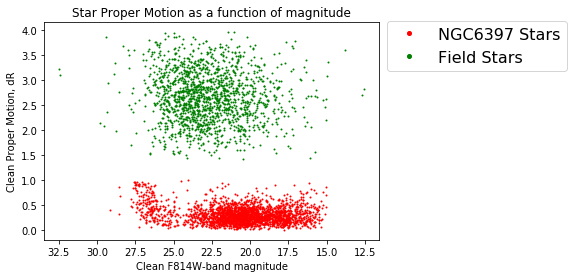

In [77]:
NGC_dR = np.sqrt(NGC_dX**2+NGC_dY**2)
field_dR = np.sqrt(field_dX**2+field_dY**2)
clean_F814W = cleanData[:,3]
clean_F606W = cleanData[:,2]
field_F814 = clean_F814W[fieldStars]


NGC_F814 = clean_F814W[clustars]
NGC_dR = NGC_dR[NGC_F814>=15]
NGC_F814_2 = NGC_F814[NGC_F814>=15]

plt.plot(NGC_F814_2, NGC_dR, 'ro', markersize = 1, label="NGC6397 Stars")
plt.plot(field_F814, field_dR, 'go', markersize = 1, label="Field Stars")
plt.ylabel("Clean Proper Motion, dR")
plt.xlabel("Clean F814W-band magnitude")
plt.title("Star Proper Motion as a function of magnitude")
plt.legend(bbox_to_anchor=(1, 1.045), loc='upper left', prop={'size': 16},markerscale = 4)
plt.gca().invert_xaxis()

Text(0.5, 1.0, 'CMD of field stars')

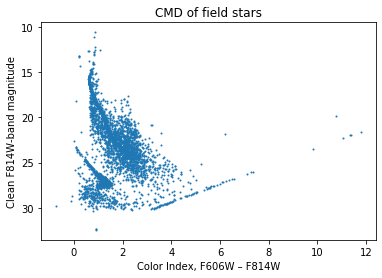

In [78]:
colIndex = clean_F606W - clean_F814W

plt.plot(colIndex, clean_F814W, 'o', markersize=1)
plt.xlabel("Color Index, F606W – F814W")
plt.ylabel("Clean F814W-band magnitude")
plt.gca().invert_yaxis()
plt.title("CMD of field stars")

In [43]:
NGC_F606 = clean_F606W[clustars]
test_F606 = clean_F606W[clean_dR<=1.3]
(NGC_F606 == test_F606).all()

True

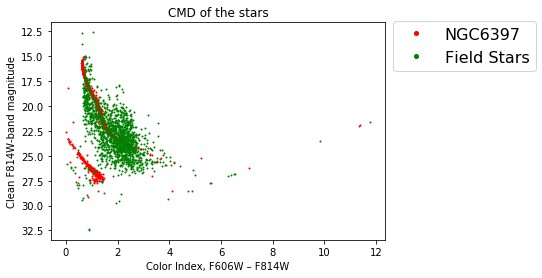

In [79]:
NGC_F606 = clean_F606W[clustars]
field_F606 = clean_F606W[fieldStars]

NGC_colIndex = NGC_F606 - NGC_F814
field_colIndex = field_F606 - field_F814

plt.plot(NGC_colIndex[NGC_F814>=15], NGC_F814[NGC_F814>=15], 'ro', markersize = 1, label="NGC6397")
plt.plot(field_colIndex, field_F814, 'go', markersize = 1, label="Field Stars")
plt.xlabel("Color Index, F606W – F814W")
plt.ylabel("Clean F814W-band magnitude")
plt.gca().invert_yaxis()
plt.title("CMD of the stars")
plt.legend(bbox_to_anchor=(1, 1.045), loc='upper left', prop={'size': 16},markerscale = 4)

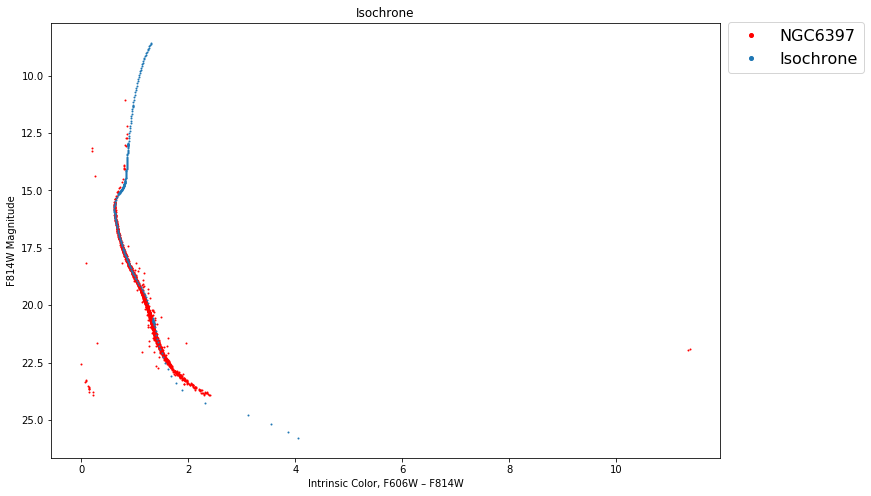

In [200]:
isoData = np.loadtxt("iso.dat")
mass = isoData[:,0]
colour = isoData[:,1]
absMag = isoData[:,2]

# To plot in new window to check points. 
# %matplotlib qt  

# To plot in same windows, under cell. 
#%matplotlib inline  

plt.figure(figsize=(12,8))
plt.plot(NGC_colIndex[NGC_F814<=24], NGC_F814[NGC_F814<=24], 'ro', markersize = 1, label="NGC6397")
plt.plot(colour+0.19, absMag+12.45, 'o', markersize = 1, label="Isochrone")
plt.xlabel("Intrinsic Color, F606W – F814W")
plt.ylabel("F814W Magnitude")
plt.gca().invert_yaxis()
plt.title("Isochrone")
plt.legend(bbox_to_anchor=(1, 1.02), loc='upper left', prop={'size': 16},markerscale = 4)

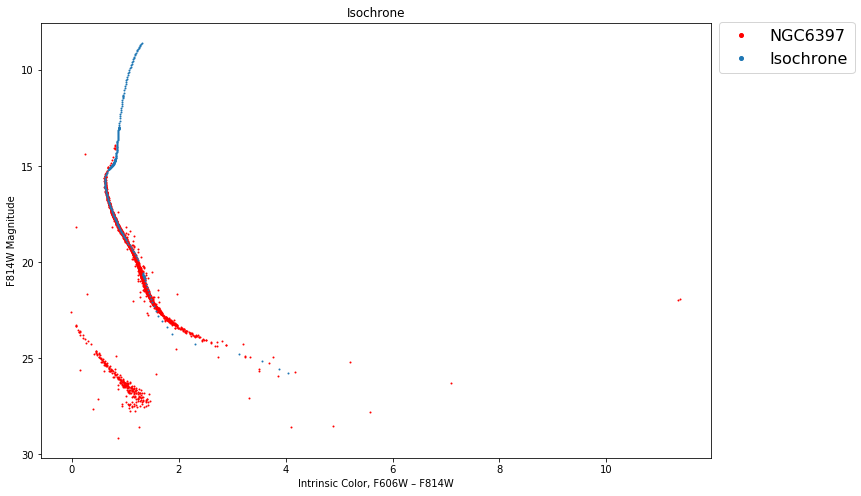

In [202]:
isoData = np.loadtxt("iso.dat")
mass = isoData[:,0]
colour = isoData[:,1]
absMag = isoData[:,2]

# To plot in new window to check points. 
# %matplotlib qt  

# To plot in same windows, under cell. 
#%matplotlib inline  

plt.figure(figsize=(12,8))
plt.plot(NGC_colIndex[NGC_F814>=13.75], NGC_F814[NGC_F814>=13.75], 'ro', markersize = 1, label="NGC6397")
plt.plot(colour+0.19, absMag+12.45, 'o', markersize = 1, label="Isochrone")
plt.xlabel("Intrinsic Color, F606W – F814W")
plt.ylabel("F814W Magnitude")
plt.gca().invert_yaxis()
plt.title("Isochrone")
plt.legend(bbox_to_anchor=(1, 1.02), loc='upper left', prop={'size': 16},markerscale = 4)

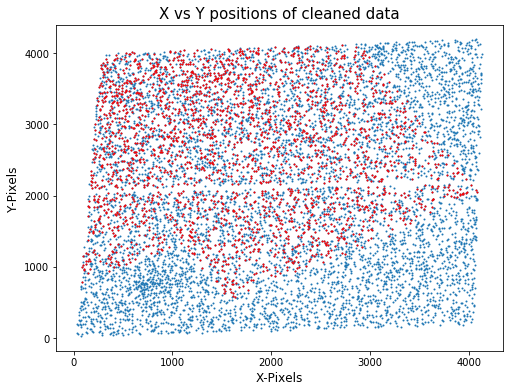

In [29]:
cleanData = data[np.logical_or(dX != 999.999, dY != 999.999)]  # Can also be achieved by the folllowing:

# cleanData = []

# for i in range(len(dX)):
#     if dX[i] != 999.999:
#         cleanData.append(data[i,:])

#cleanData = np.array(cleanData)

cleanX, cleanY = cleanData[:,0], cleanData[:,1]
clean_dX, clean_dY = cleanData[:,4], cleanData[:,5]

clustars = np.where((clean_dX**2+clean_dY**2)<1.3**2)

NGC_X, NGC_Y = cleanX[clustars], cleanY[clustars]


plt.figure(figsize=(8,6))
plt.plot(X, Y, 'o', markersize = 1)
plt.plot(NGC_X, NGC_Y,'ro', markersize=1, label="NGC6397 Stars")
plt.xlabel("X-Pixels",fontsize=12)
plt.ylabel("Y-Pixels",fontsize=12)
plt.title("X vs Y positions of cleaned data",fontsize=15)  
plt.savefig("plot2.png")